In [1]:
import pandas as pd
import numpy as np
import re

In [36]:
# read in xls as a dataframe
df = pd.read_excel('GSAF5.xls')

# clean our columns
df['Activity'] = df['Activity'].str.lower()
df['Activity'] = df['Activity'].str.replace('-','')
df['Species '] = df['Species '].str.lower()
df['Country'] = df['Country'].str.upper()

df.rename(columns={'Fatal (Y/N)':'Fatal','Species ':'Species','Sex ':'Sex'}, inplace=True)
df.drop(['Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22','pdf', 'href formula', 'href'],inplace=True, axis=1)

In [37]:
# clean our Fatal column up
def clean_Fatal(x):
    if x == 'Y':
        return True
    elif x == 'UNKNOWN':
        return ''
    else:
        return False

In [38]:
df.Fatal = df.Fatal.map(clean_Fatal)

In [39]:
# clean up our dates w/ some regex-ing
def year(x):
    res = re.search(r'([0-9]{4})',str(x))
    if res is None:
        return None
    else: 
        return int(res.group())

def day(x):
    res = re.search(r'(^|\b)(([0-9]{2}))(?=-)',str(x))
    if res is None:
        return None
    else:
        return int(res.group())
    
def month(x):
    res = re.search(r'(?!-)(([A-Za-z]{3}))(?=-)',str(x))
    if res is None:
        return None
    else:
        return str(res.group())

df['year'] = df['Date'].map(year)
df['month'] = df['Date'].map(month)
df['day'] = df['Date'].map(day)

In [40]:
df.Activity.value_counts()

surfing                                                                                                                                   854
swimming                                                                                                                                  779
fishing                                                                                                                                   383
spearfishing                                                                                                                              303
bathing                                                                                                                                   152
wading                                                                                                                                    134
diving                                                                                                                                    120
standi

In [126]:
df[(df.Activity=='murder')][['Date','Country','Activity','Injury']]

,Date,Country,Activity,Injury
146,Reported 1776,GUINEA,murder,FATAL
546,Reported 20-Oct-1893,INDIA,murder,FATAL
3254,17-Mar-1984,SOMALIA,murder,Forced at gunpoint to jump overboard. Presume...
4720,Oct-2006,GULF OF ADEN,murder,"FATAL, beaten & thrown overboard by smugglers..."
4752,22-Mar-2007,YEMEN,murder,"FATAL, beaten & thrown overboard by smugglers..."
4780,Jul-2007,SENEGAL,murder,NaN


In [127]:
#df[df['Activity'].str.contains('diving')==True]['Activity'].value_counts()

In [128]:
def types(x):
    if re.search(r'\bscuba\b',str(x)):
        x='scuba_diving'
        return x
    elif re.search(r"\bspearfishing\b",str(x)) and not(re.search(r'\bscuba\b',str(x))):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bswimming\b",str(x)):
        x = 'swimming'
        return x
    elif re.search(r"\bstanding\b",str(x)):
        x = 'standing'
        return x
    elif re.search("bodysurfing",str(x)) or (re.search("body surfing",str(x))):
        x = 'body_surfing'
        return x
    elif re.search("bodyboarding",str(x)) or (re.search("body-boarding",str(x)))or (re.search("body boarding",str(x))):
        x = 'body_boarding'
        return x
    elif re.search(r"\bsurfing\b",str(x)) or (re.search("surfboard",str(x))):
        x = 'surfing'
        return x
    elif re.search("surf-skiing",str(x)) or (re.search("surf skiing",str(x))) or (re.search("surfskiing",str(x))):
        x = 'surf_skiing'
        return x
    elif re.search("pearl diving",str(x)):
        x = 'pearl_diving'
        return x
    elif re.search(r"\bdiving\b",str(x)):
        x = 'diving'
        return x
    elif re.search(r"\bspear\b",str(x)):
        x = 'spear_fishing'
        return x
    elif re.search(r"\bbathing\b",str(x)):
        x = 'bathing'
        return x
    elif re.search(r"\bfishing\b",str(x)):
        x = 'fishing'
        return x
    elif re.search(r"\bfreediving\b",str(x)) or (re.search("free diving",str(x))):
        x = 'free_diving'
        return x
    elif re.search("boogie",str(x)):
        x = 'boogie_boarding'
        return x
    elif re.search("capsized",str(x)) or (re.search("sank",str(x))) or (re.search("went down",str(x))) \
    or (re.search("disaster",str(x))) or (re.search("crash",str(x))) or (re.search("wreck",str(x))):
        x = 'sea_disaster'
        return x
    elif re.search(r"\bwading\b",str(x)):
        x = 'wading'
        return x
    else: return x

df['Activity'] = df['Activity'].map(types)

In [201]:
df.Type.value_counts()

Unprovoked      4239
Provoked         521
Invalid          489
Boating          291
Sea Disaster     219
dtype: int64

In [221]:
top_activities = df[df.Type=='Unprovoked'].Activity.value_counts().index.tolist()[:10]
df_top_activities = df[df.Activity.isin(top_activities) & (df.year >1950) & (df.Type=='Unprovoked')].dropna(axis=0,subset=['year'])
df_top_activities.groupby(['Activity','year']).count().reset_index()

,Activity,year,Case Number,Date,Year,Type,Country,Area,Location,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,month,day
0,bathing,1951,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1
1,bathing,1954,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1,1,0
2,bathing,1956,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1
3,bathing,1957,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,0
4,bathing,1958,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0
5,bathing,1959,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
6,bathing,1960,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0
7,bathing,1961,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
8,bathing,1963,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
9,bathing,1965,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1


In [224]:
years = range(1950, 2016)
activities = df_top_activities.Activity.unique()

import itertools

# http://stackoverflow.com/questions/12130883/r-expand-grid-function-in-python
def expandgrid(*itrs):
   product = list(itertools.product(*itrs))
   return {'Var{}'.format(i+1):[x[i] for x in product] for i in range(len(itrs))}

all_combos = expandgrid(activities, years)
all_combos = pd.DataFrame(all_combos)
all_combos.columns = ["Activity", "year"]
all_combos.head()
all_years = pd.merge(all_combos, df_top_activities, on=["year", "Activity"], how='left')
all_years = all_years.groupby(['Activity','year']).count().reset_index()

all_years.to_csv('./plotting.csv',index=False)

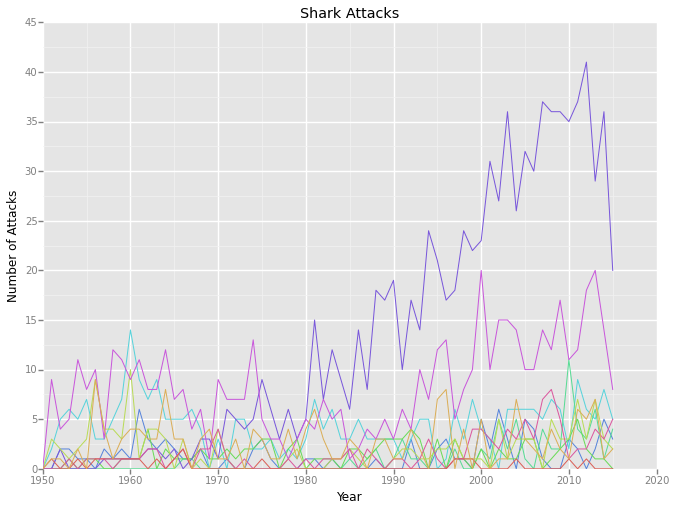

<ggplot: (-9223372036568303672)>

In [223]:
from ggplot import *

ggplot(aes(x='year', y='Case Number', color='Activity'),all_years) + geom_line() + ylab("Number of Attacks") +\
    xlab("Year") + ggtitle("Shark Attacks by Activity Type")

In [12]:
# df.to_csv('./sharks_cleaned_2.csv',index=False)

In [225]:
# plotting unprovoked attacks in the USA post 1900
df2 = df[(df.Country=='USA') & (df.year>1900) & (df.Type=='Unprovoked')]

In [226]:
def coords_null(row):
    if row.latitude=='':
        print(row)

In [50]:
import time
from geopy.geocoders import GoogleV3
from geopy.geocoders import Nominatim
geolocator = GoogleV3()
geolocator2 = Nominatim()

In [227]:
geolocator.geocode('66 w 39th street new york city')

Location(66 West 39th Street, New York, NY 10018, USA, (40.7526707, -73.98517, 0.0))

In [51]:
def get_location(row):
    time.sleep(.02)
    loc = str(row.Location) + ', ' + str(row.Area) + ', ' + str(row.Country)
    for _ in range(1):
        try:
            #try our first
            location = geolocator.geocode(loc)
            print(location)
            print(row.index)
            if not location==None:
                lat = location[1][0]
                long = location[1][1]
                return lat, long
            else:
                try:
                    location = geolocator.geocode2(loc)
                    print(location)
                    print(row.index)
                    if not location==None:
                        lat = location[1][0]
                        long = location[1][1]
                        return lat, long
                    else:
                        return None, None
                except:
                    return None, None
                    continue
        except:
            return None, None
            continue
        return row.latitude, row.longitude

In [54]:
# get our coordinates
df2['latitude'], df2['longitude'] = zip(*df2.apply(get_location,axis=1))

Beaufort, NC, USA
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'year',
       'month', 'day'],
      dtype='object')
Gadsden Point, Tampa, FL 33621, USA
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'year',
       'month', 'day'],
      dtype='object')
Palm Beach, FL, USA
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'year',
       'month', 'day'],
      dtype='object')
Capistrano, Irvine, CA 92602, USA
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Loca

/Users/coristig/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [57]:
# df2.to_csv('./sharks_coords.csv',index=False)

In [2]:
df2 = pd.read_csv('sharks_coords.csv')
df2.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'year',
       'month', 'day', 'latitude', 'longitude'],
      dtype='object')

In [3]:
df2[['Area','Location','Country','latitude', 'longitude']].head()

,Area,Location,Country,latitude,longitude
0,North Carolina,Somewhere between Hatteras and Beaufort,USA,34.718217,-76.663819
1,Florida,"Gadsden Point, Tampa Bay",USA,27.822248,-82.473150
2,Florida,"Palm Beach, Palm Beach County",USA,26.705621,-80.036430
3,California,"Capistrano, Orange County",USA,33.723150,-117.776661
4,Florida,"Mosquito Inlet (Ponce Inlet), Volusia County",USA,29.096373,-80.936998


In [4]:
# lets plot our attacks in the USA
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: No module named 'mpld3.display'

In [ ]:
# create a new df with only locations we have coords for 
dfc = df2.dropna(axis=0, subset=['latitude'])

# USA Plot
USA_map = Basemap(projection='mill', resolution = 'l', llcrnrlon=-180, llcrnrlat=2, urcrnrlon=-62, urcrnrlat=60)
              
plt.figure(figsize=(18,18))

x1,y1 = USA_map(dfc['longitude'].tolist(), dfc['latitude'].tolist())
USA_map.plot(x1,y1, 'bo', markersize=7,alpha=.3)

USA_map.drawlsmask(lakes=False)
USA_map.drawcoastlines(color='gray')
USA_map.fillcontinents(color = 'lightgrey')
USA_map.drawmapboundary()
USA_map.drawstates()
USA_map.bluemarble(alpha=.2)
USA_map.drawcountries()

/Users/coristig/anaconda/lib/python3.4/site-packages/numpy/core/fromnumeric.py:221: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/Users/coristig/anaconda/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:3916: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy
  np.concatenate((lsmask_lons,lsmask_lons[1:]+360),1)
/Users/coristig/anaconda/lib/python3.4/site-packages/mpl_toolkits/basemap/__init__.py:4117: DeprecationWarning: axis != 0 for ndim == 1; this will raise an error in future versions of numpy
  np.concatenate((self._bm_lons,self._bm_lons+360),1)


In [412]:
# looks like we have some "landsharks!"  Lets use a clustering algorithm to see if we can see which points are not coastal

In [27]:
from sklearn import neighbors

coords = np.column_stack((dfc.latitude,dfc.longitude))

tree = neighbors.KDTree(coords,leaf_size=2)
dist, ind = tree.query(coords[7], k=5)     
print(ind[0])  # indices of 4 closest neighbors
print(sum(dist[0][1:]))  # distances to 4 closest neighbors

[  7 379 251 152 420]
0.130272705615


In [21]:
print(dist[0])
print(dist[0][1:])

[ 0.          0.03256818  0.03256818  0.03256818  0.03256818]
[ 0.03256818  0.03256818  0.03256818  0.03256818]


In [31]:
sums = []
for i in range(len(coords)):
    dist, ind = tree.query(coords[i], k=5)
    sums.append(sum(dist[0][1:]))
    
dfc['dist_sums'] = pd.Series(sums, index=dfc.index)

/Users/coristig/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
outliers = dfc.sort(['dist_sums'], ascending=False)

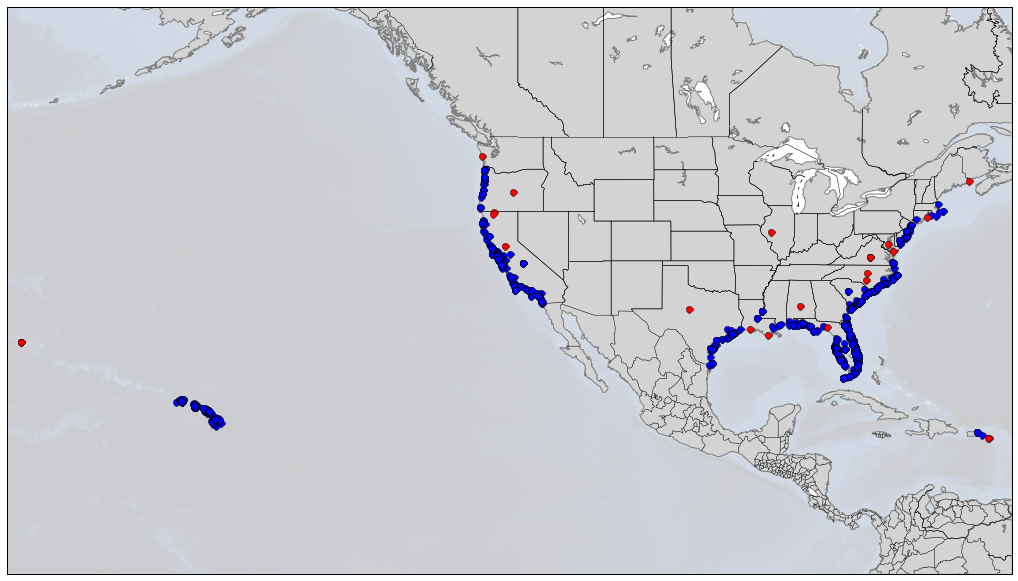

In [34]:
# USA Plot
USA_map = Basemap(projection='mill', resolution = 'l',
    llcrnrlon=-180, llcrnrlat=2,
    urcrnrlon=-62, urcrnrlat=60)
              
plt.figure(figsize=(18,18))

x1,y1 = USA_map(outliers['longitude'][25:].tolist(), outliers['latitude'][25:].tolist())
x2,y2 = USA_map(outliers['longitude'][:25].tolist(), outliers['latitude'][:25].tolist())

USA_map.plot(x1,y1, 'bo', markersize=7)
USA_map.plot(x2,y2, 'ro', markersize=7)

USA_map.drawlsmask(lakes=False)
USA_map.drawcoastlines(color='gray')
USA_map.fillcontinents(color = 'lightgrey')
USA_map.drawmapboundary()
USA_map.drawcountries()
USA_map.drawstates()
USA_map.bluemarble(alpha=.2)

In [487]:
outliers['Case Number'][2:3]

4474    2004.05.04
Name: Case Number, dtype: object

In [516]:
def fix_locs(row):
    if str(row['Case Number'])!=None:
        if row['Case Number'] == '2004.05.04':
            return (26.065704, -97.154182)
        if row['Case Number'] =='1994.09.21':
            return (45.760780, -123.968218)
        if row['Case Number'] =='1992.08.18':
            return (41.546678, -124.078109)
        if row['Case Number'] =='1995.08.21':
            return(34.623055, -76.535284)
        if row['Case Number'] =='1996.00.00.a':
            return (34.397812, -77.525675)
        
        #         elif str(x.Location)=='South Moss Beach, Spanish Bay, Monterey Peninsula':
#             return (36.610643, -121.949255)
#         elif str(x.Location)=='Davenport Landing':
#             return (37.023281, -122.215310)
#         elif str(x.Location)=='Capistrano, Orange County':
#             return (33.458935, -117.682083)
#         elif str(x.Location)=='North Farallon Island, Farallon Islands':
#             return (37.767277, -123.098960)
#         elif str(x.Location)=='West Cove, Catalina Island':
#             return (33.472051, -118.604834)
#         elif str(x.Name)=='Norman Piexotto':
#             return (37.733333, -122.256667)
#         elif str(x.Location)=='Pigeon Point':
#             return (37.183001, -122.394740)
#         elif str(x.Location)=='Usal Creek, Bear Harbor, Mendocino County':
#             return (39.913219, -123.938730)
#         elif str(x.Name)=='David Bull':
#             return (33.375996, -117.569556)
        else:
            return row.latitude, row.longitude

In [517]:
dfc['latitude'], dfc['longitude'] = zip(*dfc.apply(fix_locs,axis=1))

/Users/coristig/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


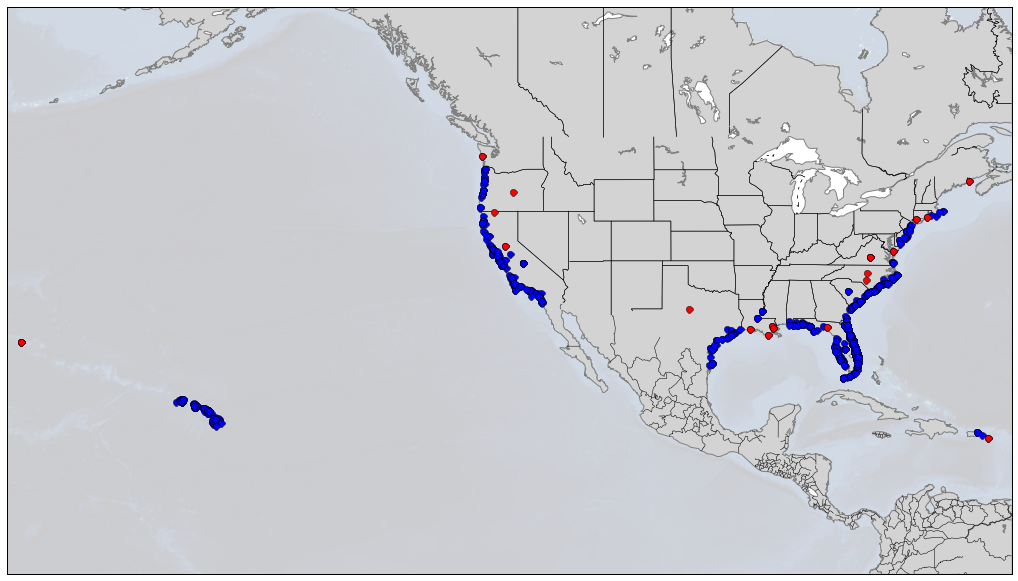

In [520]:
# USA Plot
USA_map = Basemap(projection='mill', resolution = 'l',
    llcrnrlon=-180, llcrnrlat=2,
    urcrnrlon=-62, urcrnrlat=60)
              
plt.figure(figsize=(18,18))

x1,y1 = USA_map(dfc['longitude'].tolist(), dfc['latitude'].tolist())
# x2,y2 = USA_map(outliers['longitude'][:20].tolist(), outliers['latitude'][:20].tolist())

USA_map.plot(x1,y1, 'bo', markersize=7)
USA_map.plot(x2,y2, 'ro', markersize=7)

USA_map.drawlsmask(lakes=False)
USA_map.drawcoastlines(color='gray')
USA_map.fillcontinents(color = 'lightgrey')
USA_map.drawmapboundary()
USA_map.drawstates()
USA_map.bluemarble(alpha=.2)

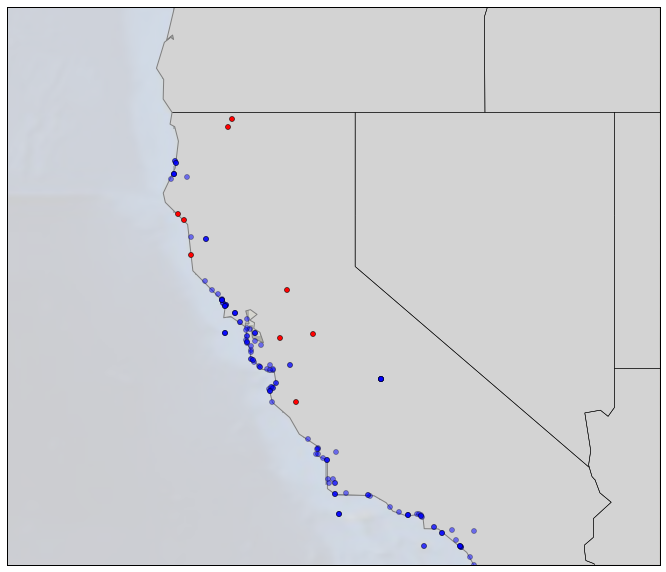

In [44]:
CA_map = Basemap(projection='mill', resolution='l',
    llcrnrlon=-128, llcrnrlat=33,
    urcrnrlon=-113, urcrnrlat=44)

plt.figure(figsize=(18,10))

# coords for fatal attacks 
x1,y1 = CA_map(outliers[(outliers.Area=='California')]['longitude'][:10].tolist(),outliers[(outliers.Area=='California')]['latitude'][:10].tolist())
x2,y2 = CA_map(outliers[(outliers.Area=='California')]['longitude'][10:].tolist(),outliers[(outliers.Area=='California')]['latitude'][10:].tolist())


CA_map.plot(x2,y2, 'bo', markersize=5,alpha=.5)
CA_map.plot(x1,y1, 'ro', markersize=5)

CA_map.drawlsmask(lakes=False)
CA_map.drawcoastlines(color='gray')
CA_map.fillcontinents(color = 'lightgrey')
CA_map.drawmapboundary()
CA_map.drawstates()
CA_map.bluemarble(alpha=.2)

plt.show()

In [338]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=10)
# slice matrix so we only include the 0/1 indicator columns in the clustering
dfc['cluster'] = cluster.fit_predict(dfc[dfc.columns[22:24]])
dfc.cluster.value_counts()

9    423
0    253
1    175
3    173
2    128
4     53
5     50
6     45
8     33
7      6
dtype: int64

In [ ]:
lat < -84

KeyError: 0

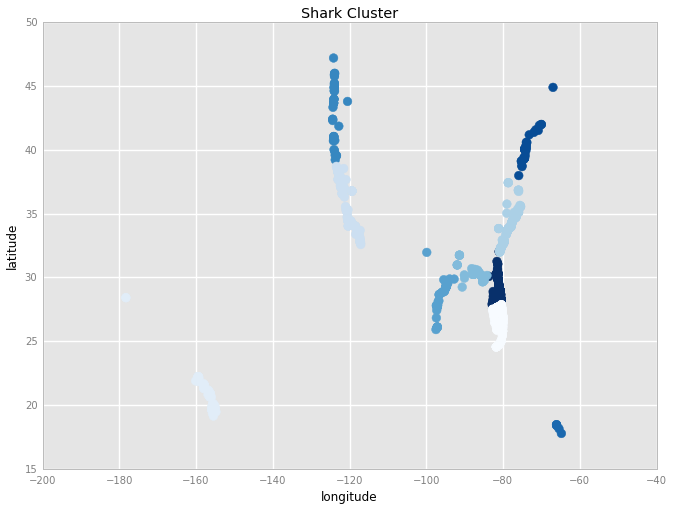

In [339]:
from ggplot import *

ggplot(dfc, aes(x='longitude', y='latitude', color='cluster')) + \
    geom_point(size=75) + \
    ggtitle("Shark Cluster")

In [340]:
dfc.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time', 'Species',
       'Investigator or Source', 'pdf', 'href formula', 'href', 'year',
       'month', 'day', 'latitude', 'longitude', 'dist_sums', 'cluster'],
      dtype='object')